In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("WebTraffic_Q1_2025.xlsx" , sheet_name=0)
df

df.shape

(600, 8)

In [3]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1
...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0


In [4]:
df.dtypes

VisitDate          datetime64[ns]
SessionDuration           float64
PageViews                 float64
ReferralSource             object
DeviceType                 object
Platform                   object
BounceRate                float64
Conversions                 int64
dtype: object

In [5]:
df.columns

Index(['VisitDate', 'SessionDuration', 'PageViews', 'ReferralSource',
       'DeviceType', 'Platform', 'BounceRate', 'Conversions'],
      dtype='object')

In [5]:

df['VisitDate'] = pd.to_datetime(df['VisitDate'])
df['SessionDuration'] = pd.to_numeric(df['SessionDuration'])
df['PageViews'] = pd.to_numeric(df['PageViews'])
df = df.dropna(subset=["VisitDate"])

In [7]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1
...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0


In [7]:
df['Month'] = df['VisitDate'].dt.month
df['DayOfWeek'] = df['VisitDate'].dt.day_name()
df['WeekNumber'] = df['VisitDate'].dt.isocalendar().week
df.head()

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions,Month,DayOfWeek,WeekNumber
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1,3,Monday,12
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0,1,Friday,1
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0,2,Tuesday,9
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0,1,Wednesday,5
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1,3,Sunday,12


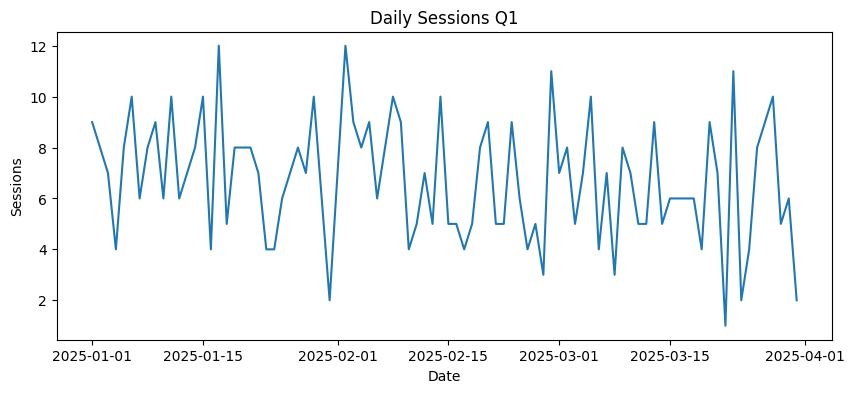

In [8]:
daily = df.groupby('VisitDate').size()
plt.figure(figsize=(10,4))
plt.plot(daily)
plt.title('Daily Sessions Q1')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.show()

In [9]:
avg_session_duration = df['SessionDuration'].mean()
avg_pageviews = df['PageViews'].mean()
avg_session_duration, avg_pageviews

(np.float64(310.72557823129256), np.float64(4.9375))

In [10]:
top_ref = df['ReferralSource'].value_counts().head(5)
top_ref

ReferralSource
Paid Search     109
Email           101
Social Media     99
Referral         98
Direct           98
Name: count, dtype: int64

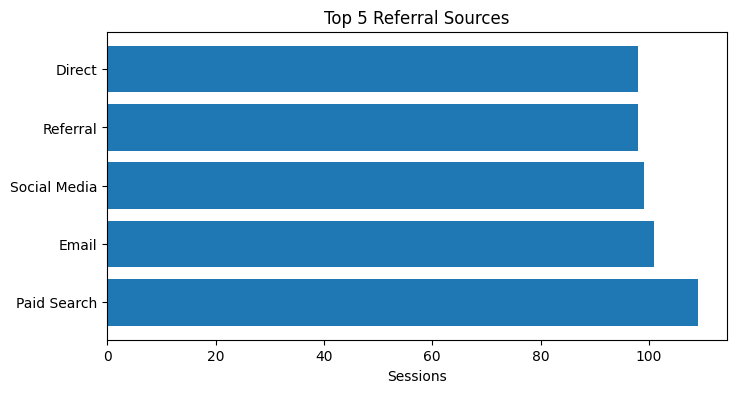

In [11]:
plt.figure(figsize=(8,4))
plt.barh(top_ref.index, top_ref.values)
plt.title('Top 5 Referral Sources')
plt.xlabel('Sessions')
plt.show()

In [12]:
total_conv = df['Conversions'].sum()
total_sessions = len(df)
conversion_rate = total_conv / total_sessions
conversion_rate

np.float64(0.14333333333333334)

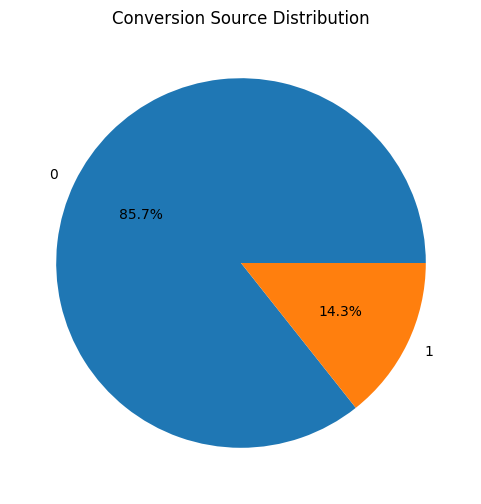

In [13]:
conv_source = df['Conversions'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(conv_source.values, labels=conv_source.index, autopct='%1.1f%%')
plt.title('Conversion Source Distribution')
plt.show()

In [14]:
df.groupby('DeviceType')['SessionDuration'].mean()

DeviceType
Desktop    316.02715
Mobile     311.35230
Tablet     304.83559
Name: SessionDuration, dtype: float64

In [15]:
conv_by_dev = df.groupby('DeviceType')['Conversions'].sum() / df.groupby('DeviceType').size()
conv_by_dev

DeviceType
Desktop    0.153846
Mobile     0.121359
Tablet     0.155779
dtype: float64

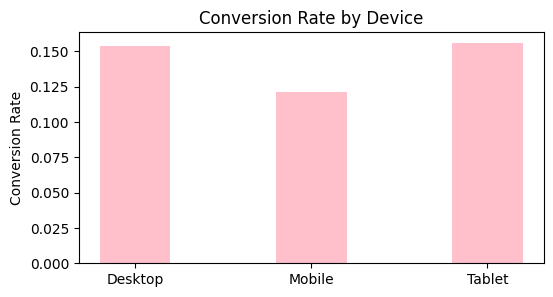

In [18]:
plt.figure(figsize=(6,3))
plt.bar(conv_by_dev.index, conv_by_dev.values, width=0.4 , color = 'pink')
plt.title('Conversion Rate by Device')
plt.ylabel('Conversion Rate')
plt.show()

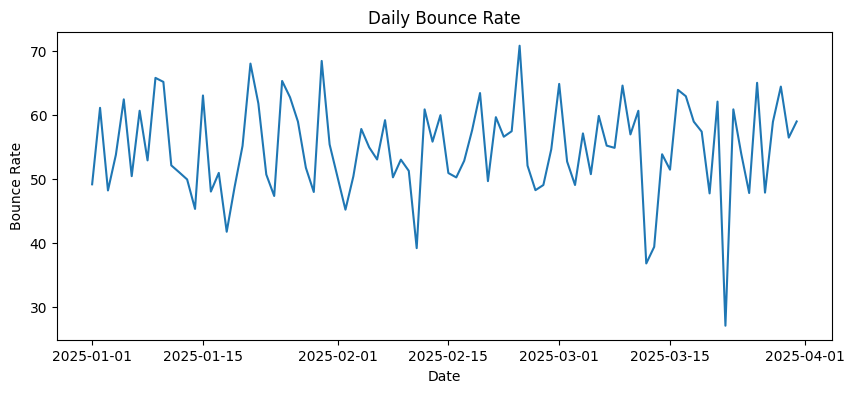

In [19]:
daily_bounce = df.groupby('VisitDate')['BounceRate'].mean()
plt.figure(figsize=(10,4))
plt.plot(daily_bounce)
plt.title('Daily Bounce Rate')
plt.xlabel('Date')
plt.ylabel('Bounce Rate')
plt.show()

In [20]:
high_bounce = daily_bounce[daily_bounce > 70]
high_bounce

VisitDate
2025-02-24    70.805
Name: BounceRate, dtype: float64